使用Python脚本的过程中,偶尔需要使用`list多层转一层`,又总是忘记怎么写搜索关键词,所以总是找了很久,现在把各种方法记录下来,方便自己也方便大家.

参考资料:
[Making a flat list out of list of lists in Python](https://stackoverflow.com/questions/952914/making-a-flat-list-out-of-list-of-lists-in-python)

In [1]:
import functools
import itertools
import numpy
import operator
import perfplot
from collections import Iterable  # or from collections.abc import Iterable
from iteration_utilities import deepflatten

#使用两次for循环
def forfor(a):
    return [item for sublist in a for item in sublist]

#通过sum
def sum_brackets(a):
    return sum(a, [])

#使用functools內建模块
def functools_reduce(a):
    return functools.reduce(operator.concat, a)

#使用itertools內建模块
def itertools_chain(a):
    return list(itertools.chain.from_iterable(a))

#使用numpy
def numpy_flat(a):
    return list(numpy.array(a).flat)

#使用numpy
def numpy_concatenate(a):
    return list(numpy.concatenate(a))

#自定义函数
def flatten(items):
    """Yield items from any nested iterable; see REF."""
    for x in items:
        if isinstance(x, Iterable) and not isinstance(x, (str, bytes)):
            yield from flatten(x)
        else:
            yield x

def pylangs_flatten(a):
    return list(flatten(a))

#使用库iteration_utilities
def iteration_utilities_deepflatten(a):
    return list(deepflatten(a, depth=1))

In [2]:
a=[[1,2,3],[4,5,6],[7,8,9]]
print(a)
print('--------------------------')
print(forfor(a))
print(sum_brackets(a))
print(functools_reduce(a))
print(itertools_chain(a))
print(numpy_flat(a))
print(numpy_concatenate(a))

print(pylangs_flatten(a))
print(iteration_utilities_deepflatten(a))

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]
--------------------------
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


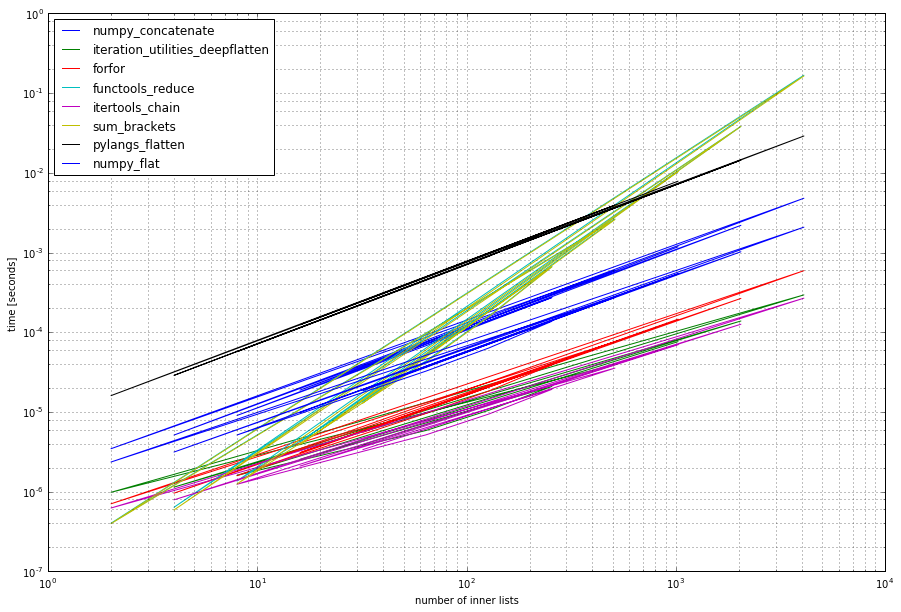

In [3]:
import matplotlib.pyplot as plt
from simple_benchmark import benchmark
b = benchmark(
    [forfor, sum_brackets, functools_reduce, itertools_chain,numpy_flat, numpy_concatenate, pylangs_flatten,iteration_utilities_deepflatten],
    arguments={2**i: [[0]*5]*(2**i) for i in range(1, 13)},
    argument_name='number of inner lists'
)

plt.subplots(1,1,figsize=(15,10))
b.plot()
plt.legend(loc = 'upper left')
plt.show()
#注:图片的和发布的文章不同,只是每个方法赋予的颜色变化了